# Picking Stocks

## Diversification

**The idea about building a portfolio is that we want to diversify our portfolio as much as possible. Diversification is where we try to reduce risk and maximize returns by choosing stocks that are not correlated. For example, if we build a two stock portfolio entirely of ATT and Verizon, our portfolio is not diversified. Both of these stocks fall under the same industry. We are taking a lot of risk since it is possible that if one performs poorly, the other one will most likely perfom poorly. A two stock diversified portfolio would be on where one stock is from one industry and the other is from another. The idea that if one stock does poorly, the perfomance is offset by the performance of the other stock since the two stocks are not affect by the same indsutry.**

## Correlation between stocks

**We will select stocks by calcuting how correlated the stocks are to one another. We want to build a portfolio that is diversified.**

In [1]:
# Modules needed for this task
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Create empy dataframe for all stocks
allStockdf = pd.DataFrame()
# Load the data from CSV to dataframe 
# Create a class to laod data 
class loadData:
    def __init__(self, name):
        self.name = name
    
    def readCSV(self):
        df = pd.read_csv("{}.csv".format(self.name),usecols = ['Date','adj close'])
        df['Symbol'] = self.name
        df.Date  = pd.to_datetime(df.Date)
        return df

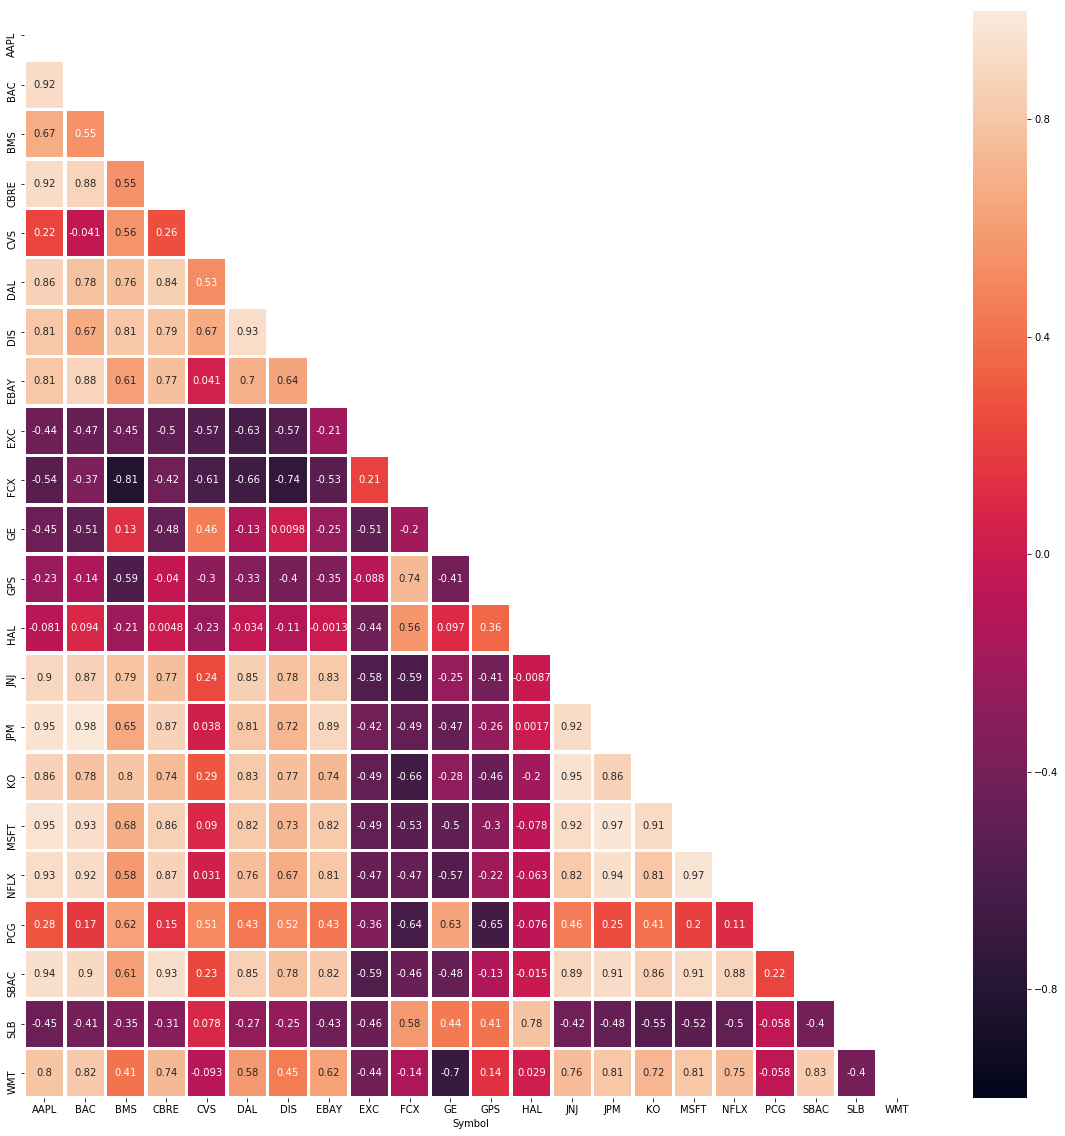

In [14]:
# Stocks from Information Technology
# AAPL went public in 1980
AAPLStock = loadData('AAPL').readCSV()
# MSFT went public in 1986
MSFTStock = loadData('MSFT').readCSV()

# Stocks from Consumer Discretionary
# GPS wen public in 1980
GPSStock = loadData('GPS').readCSV()
# Ebay went public in 1998
EBAYStock = loadData('EBAY').readCSV()

# Stocks from communication Services
# NFLX went public in 2002
NFLXStock = loadData('NFLX').readCSV()
# DIS went public in 1962
DISStock = loadData('DIS').readCSV()

# Stocks from Health Care
# JNJ went public in 1962
JNJStock = loadData('JNJ').readCSV()
# CVS went public in 1996
CVSStock = loadData('CVS').readCSV()

# Stocks from Consumer Staples
# WMT went public in 1972
WMTStock = loadData('WMT').readCSV()
# KO went public in 1962
KOStock = loadData('KO').readCSV()

# Stocks from Industrials
# GE went public in 1962
GEStock = loadData('GE').readCSV()
# DAL went public in 2007
DALStock = loadData('DAL').readCSV()

# Stocks from Materials
# FCX went public in 1995
FCXStock = loadData('FCX').readCSV()
# BMS went public in 1980
BMSStock = loadData('BMS').readCSV()

# Stocks from Energy
# SLB went public in 1981
SLBStock = loadData('SLB').readCSV()
# HAL went public in 1972
HALStock = loadData('HAL').readCSV()

# Stocks from Real Estate
# CBRE went public in 2004
CBREStock = loadData('CBRE').readCSV()
# SBAC went public in 1999 
SBACStock = loadData('SBAC').readCSV()

# Stocks from Financials
# JPM went public in 1980
JPMStock = loadData('JPM').readCSV()
# BAC went public in 1980
BACStock = loadData('BAC').readCSV()

# Stocks from Utilities
# PCG went public in 1972
PCGStock = loadData('PCG').readCSV()
# EXC went public in 1980
EXCStock = loadData('EXC').readCSV()

# Append all stocks into a pivot table
StockData = [AAPLStock, MSFTStock, GPSStock, EBAYStock, NFLXStock, DISStock, JNJStock,
            CVSStock, WMTStock, KOStock, GEStock, DALStock, FCXStock, BMSStock, 
            SLBStock, HALStock, CBREStock, SBACStock, JPMStock,BACStock, PCGStock,EXCStock]

for stockdf in StockData:
    allStockdf = allStockdf.append(stockdf)

# create pivot table from the two stocks 
allStockPivot = allStockdf.pivot_table(index='Date', columns='Symbol', values = 'adj close').reset_index()

allStockPivot

# Create correlation data frame 
corrDf = allStockPivot.corr(method='pearson')

corrDf

# Delete the multiindex name to make it cripsy
del corrDf.index.name

corrDf

mask = np.zeros_like(corrDf)
mask[np.triu_indices_from(mask)] = True

# generate a heat map with seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corrDf, vmax=1.0, vmin=-1.0,linewidths=2.5, 
            mask=mask, annot=True)


# Final stocks

## Heat Map

**After calculating the correlation of the different stocks, we plot them against each other with a heatmap. The heatmap allows us to easier understand the relationship between the stocks. We masked the heatmap across the diagonal to make interpretting the map easier. The masked sqaures do not provide additional information since they are mirrored values. We also annotated the heat map to show the correlations between the different sqaures. We will be selecting the ten stocks for our final project by obtaining stocks that are uncorrelated. We will be looking for squares that are zero or near zero.**

## Decision

**The stocks that we will be using for this porject are JPM, CVS, HAL, EBAY, NFLX, SBAC, GPS,PCG,WMT, and DIS** 